### Opentrons code
Here:
https://github.com/Opentrons/opentrons/blob/98da6c5df989432000ced0d04debe0ff8be25ecd/api/src/opentrons/system/camera.py

...but not directly useable!

# List available capture devices


In [ ]:
!ffmpeg -hide_banner -sources

# Show resolution of specific capture device

In [ ]:
# Respolution
!ffmpeg -hide_banner -list_formats all -i /dev/video0

# Define filename (timestamp or simple)

In [9]:
from datetime import datetime


#filename_base = datetime.strftime(now, "%Y-%m-%d_%H-%M-%S")
filename_base = "test"

# Add extensions
filename_full_image = filename_base + ".png"
filename_full_video = filename_base + ".mp4"

# Capture image

In [3]:
# Capture photo
!ffmpeg -hide_banner -y -f video4linux2  -s 1920x1080 -i /dev/video0 -ss 0:0:1 -vf "transpose=2,transpose=2" -frames 1 {filename_full_image}
#!ffmpeg -y -f video4linux2  -i /dev/video0 -s 640x480 -ss 0:0:1 -vf "transpose=2,transpose=2" -frames 1 {filename_full_image}
#!ffmpeg -y -f video4linux2  -i /dev/video0 -s 1280x720 -ss 0:0:1 -vf "transpose=2,transpose=2" -frames 1 {filename_full_image}

[video4linux2,v4l2 @ 0x1ac4f30] The V4L2 driver changed the video from 1920x1080 to 800x600
Input #0, video4linux2,v4l2, from '/dev/video0':
  Duration: N/A, start: 224824.151139, bitrate: 115200 kb/s
    Stream #0:0: Video: rawvideo (YUY2 / 0x32595559), yuyv422, 800x600, 115200 kb/s, 15 fps, 15 tbr, 1000k tbn, 1000k tbc
Stream mapping:
  Stream #0:0 -> #0:0 (rawvideo (native) -> png (native))
Press [q] to stop, [?] for help
Output #0, image2, to 'test.png':
  Metadata:
    encoder         : Lavf57.83.100
    Stream #0:0: Video: png, rgb24, 800x600, q=2-31, 200 kb/s, 15 fps, 15 tbn, 15 tbc
    Metadata:
      encoder         : Lavc57.107.100 png
frame=    1 fps=0.4 q=-0.0 Lsize=N/A time=00:00:00.13 bitrate=N/A speed=0.0588x    
video:219kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


# Show image

## File info

In [4]:
# Print captured info
!file {filename_full_image}

test.png: PNG image data, 800 x 600, 8-bit/color RGB, non-interlaced


In [5]:
!ffmpeg -hide_banner -i {filename_full_image}

Input #0, png_pipe, from 'test.png':
  Duration: N/A, bitrate: N/A
    Stream #0:0: Video: png, rgb24(pc), 800x600, 25 tbr, 25 tbn, 25 tbc
At least one output file must be specified


## Display image

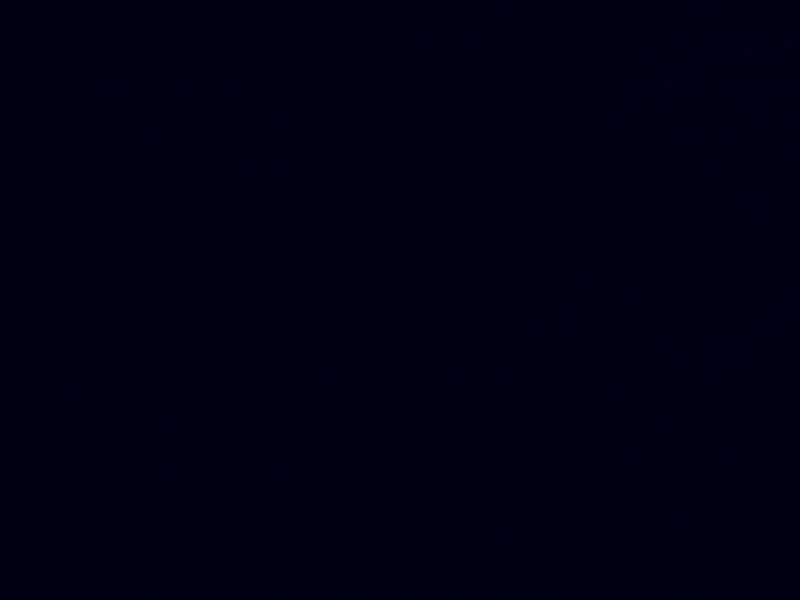

In [8]:
from IPython.display import Image
Image(filename=filename_full_image, unconfined=False) 

# Capture video
https://stackoverflow.com/questions/47292785/recording-from-webcam-using-ffmpeg-at-high-framerate

In [14]:
# 5 seconds of video
!ffmpeg -hide_banner -y -f video4linux2 -i /dev/video0 -t 00:00:05 -vf "transpose=2,transpose=2" -vcodec mpeg4 {filename_full_video}

Input #0, video4linux2,v4l2, from '/dev/video0':
  Duration: N/A, start: 225039.580276, bitrate: 115200 kb/s
    Stream #0:0: Video: rawvideo (YUY2 / 0x32595559), yuyv422, 800x600, 115200 kb/s, 15 fps, 15 tbr, 1000k tbn, 1000k tbc
Stream mapping:
  Stream #0:0 -> #0:0 (rawvideo (native) -> mpeg4 (native))
Press [q] to stop, [?] for help
Output #0, mp4, to 'test.mp4':
  Metadata:
    encoder         : Lavf57.83.100
    Stream #0:0: Video: mpeg4 (mp4v / 0x7634706D), yuv420p, 800x600, q=2-31, 200 kb/s, 15 fps, 15360 tbn, 15 tbc
    Metadata:
      encoder         : Lavc57.107.100 mpeg4
    Side data:
      cpb: bitrate max/min/avg: 0/0/200000 buffer size: 0 vbv_delay: -1
Past duration 0.667000 too large6kB time=00:00:01.13 bitrate=1850.6kbits/s dup=4 drop=0 speed=1.08x    
Past duration 0.708168 too large
Past duration 0.806496 too large
Past duration 0.844368 too large
Past duration 0.944130 too large
frame=   75 fps= 16 q=9.7 Lsize=     362kB time=00:00:04.93 bitrate= 600.6kbits/s dup=4

## Video info

In [15]:
# Print captured info
!file {filename_full_video}

test.mp4: ISO Media, MP4 Base Media v1 [IS0 14496-12:2003]


In [16]:
!ffmpeg -hide_banner -i {filename_full_video}

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'test.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2mp41
    encoder         : Lavf57.83.100
  Duration: 00:00:05.00, start: 0.000000, bitrate: 592 kb/s
    Stream #0:0(und): Video: mpeg4 (Simple Profile) (mp4v / 0x7634706D), yuv420p, 800x600 [SAR 1:1 DAR 4:3], 590 kb/s, 15 fps, 15 tbr, 15360 tbn, 15 tbc (default)
    Metadata:
      handler_name    : VideoHandler
At least one output file must be specified


## Display video
...none of the below methods appear to be working

In [ ]:
# import IPython.display.HTML class, because this example will use html to embed a local video file to display, so need the HTML class.
from IPython.display import HTML
# import base64.b64encode, the video file need to be encoded with base64 encoding.
from base64 import b64encode
# open local mp4 video file with read permission, rb means read binary file. 
file = open("./video.mp4", "rb")
# read the file content to video variable.
video_data = file.read()
# encode the video content with base64 encoding format.
video_data_encoded = b64encode(video_data)
# create embedded video html tag text. use base64 encoded video data to replace the {0} placeholder.
video_html_tag_text = '<video controls alt="display local video in jupyter notebook" src="data:video/x-m4v;base64,{0}">'.format(video_data_encoded)
# create a IPython.display.HTML object to display above embedded video html tag. 
html = HTML(data=video_html_tag_text)
# display html object in jupyter notebook
html

### using IPython library

In [ ]:
!pwd

In [ ]:
# This cell is not currently working...

# from IPython.display import Video
# Video(filename=filename_full_video) 

### via magic cell

In [ ]:
%%HTML
<video width="320" height="240" controls>
  <source src="/var/lib/jupyter/notebooks/video.mp4" type="video/mp4">
</video>

### via Markdown

<video controls src="/var/lib/jupyter/notebooks/test.mp4" />